In [18]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Vehicles

In [22]:
for model in ['full', 'me', 'edge', 'baseline']:
    print(f"FDE Results for: {model}")
    for ph in [2, 4, 6, 8]:
        print(f"-----------------PH: {ph} -------------------")
        perf_df = pd.DataFrame()
        for f in glob.glob(f"csv/{model}_veh_fde_full*{ph}ph.csv"):
            dataset_df = pd.read_csv(f)
            dataset_df['model'] = model
            perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']
        
        print(f"FDE Mean @{ph*0.5}s: {perf_df['error_value'][perf_df['error_type'] == 'fde'].mean()}")
        del perf_df      
        
        perf_df = pd.DataFrame()
        for f in glob.glob(f"csv/{model}_veh_obs_full*{ph}ph.csv"):
            dataset_df = pd.read_csv(f)
            dataset_df['model'] = model
            perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']
        print(f"RB Viols @{ph*0.5}s: {perf_df['error_value'][perf_df['error_type'] == 'obs'].sum() / (len(perf_df['error_value'][perf_df['error_type'] == 'obs'].index)*2000)}")
        del perf_df

        perf_df = pd.DataFrame()
        for f in glob.glob(f"csv/{model}_veh_fde_mm*{ph}ph.csv"):
            dataset_df = pd.read_csv(f)
            dataset_df['model'] = model
            perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']
        print(f"FDE @{ph*0.5}s: {perf_df['error_value'][perf_df['error_type'] == 'fde'].mean()}")      
        print("----------------------------------------------")
        del perf_df
    print("")

FDE Results for: full
-----------------PH: 2 -------------------
FDE Mean @1.0s: 0.20380615197870672
RB Viols @1.0s: 0.009331367081367082
FDE @1.0s: 0.159987192509441
----------------------------------------------
-----------------PH: 4 -------------------
FDE Mean @2.0s: 0.7089245446368799
RB Viols @2.0s: 0.01796110396110396
FDE @2.0s: 0.5775874097014032
----------------------------------------------
-----------------PH: 6 -------------------
FDE Mean @3.0s: 1.4580818527562975
RB Viols @3.0s: 0.03552634777634778
FDE @3.0s: 1.2355597794019821
----------------------------------------------
-----------------PH: 8 -------------------
FDE Mean @4.0s: 2.4471793265269386
RB Viols @4.0s: 0.060967467467467465
FDE @4.0s: 2.1380248632492256
----------------------------------------------

FDE Results for: me
-----------------PH: 2 -------------------
FDE Mean @1.0s: 0.18777519200515588
RB Viols @1.0s: 0.009766516516516516
FDE @1.0s: 0.1417875049716435
---------------------------------------------

In [16]:
line_colors = ['#375397','#80CBE5','#ABCB51','#F05F78', '#C8B0B0']

In [17]:
t = [0, 1, 3]
t_ours = [0, 1, 2, 3, 4]
SLSTM_l2 = np.array([0.24, 0.71, 1.85])
CSP_l2 = np.array([0.24, 0.70, 1.74])
CARNET_l2 = np.array([0.23, 0.61, 1.58])
SPAGNN_l2 = np.array([0.22, 0.58, 1.45])
OURS_l2 = np.array([0., 0.159987192509441, 0.5775874097014032, 1.2355597794019826, 2.138024863249226])
LINEAR_l2 = np.array([0., 0.32, 0.89, 1.7, 2.73])

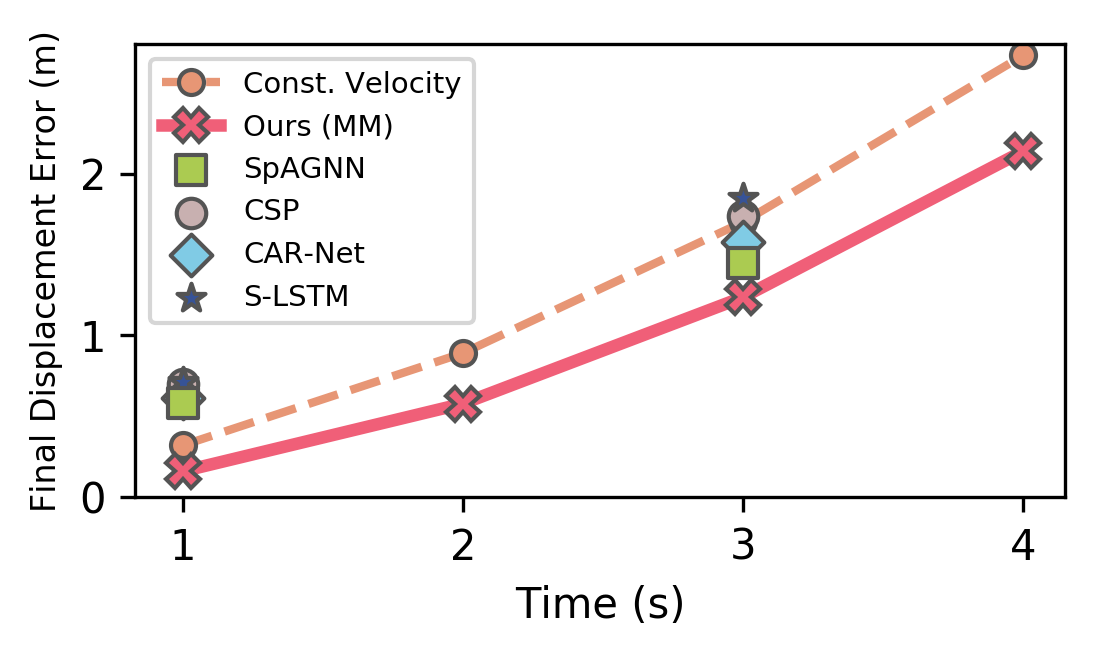

In [21]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=300)
ax.plot(t_ours[1:], LINEAR_l2[1:], '--o', linewidth=2, markersize=6 , label='Const. Velocity', c='#E79675', zorder=-10, markeredgecolor='#545454')
ax.scatter(t[1:], SPAGNN_l2[1:], 50, marker='s', label='SpAGNN', c=line_colors[2], edgecolor='#545454', zorder=2)
ax.scatter(t[1:], CSP_l2[1:], 50, marker='o' , label='CSP', c=line_colors[4], edgecolor='#545454')
ax.scatter(t[1:], CARNET_l2[1:], 50, marker='D' , label='CAR-Net', c=line_colors[1], edgecolor='#545454', zorder=1)
ax.scatter(t[1:], SLSTM_l2[1:], 50, marker='*', label='S-LSTM', c=line_colors[0], edgecolor='#545454')
ax.plot(t_ours[1:], OURS_l2[1:], '-X', linewidth=3 , label='Ours (MM)', markersize=8, c=line_colors[3], markeredgecolor='#545454')

ax.legend(loc='lower right')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Final Displacement Error (m)', fontsize=8)

ax.set_ylim((0, 2.8))
ax.xaxis.grid(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))

leg = ax.legend(loc='best', fontsize=7, frameon=True)

fig.savefig('plots/nuscenes_fde_time.pdf', dpi=300, bbox_inches='tight')

# Pedestrians

In [14]:
for model in ['full']:
    print(f"FDE Results for: {model}")
    for ph in [2, 4, 6, 8]:
        print(f"-----------------PH: {ph} -------------------")
        perf_df = pd.DataFrame()
        for f in glob.glob(f"csv/{model}_ped_fde_full*{ph}ph.csv"):
            dataset_df = pd.read_csv(f)
            dataset_df['model'] = model
            perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']
        print(f"FDE Mean @{ph*0.5}s: {perf_df['error_value'][perf_df['error_type'] == 'fde'].mean()}")
        del perf_df    
              
        perf_df = pd.DataFrame()
        for f in glob.glob(f"csv/{model}_ped_ade_full*{ph}ph.csv"):
            dataset_df = pd.read_csv(f)
            dataset_df['model'] = model
            perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']
        print(f"ADE Mean @{ph*0.5}s: {perf_df['error_value'][perf_df['error_type'] == 'ade'].mean()}")
        del perf_df
              
        perf_df = pd.DataFrame()
        for f in glob.glob(f"csv/{model}_ped_kde_full*{ph}ph.csv"):
            dataset_df = pd.read_csv(f)
            dataset_df['model'] = model
            perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']
        print(f"KDE Mean @{ph*0.5}s: {perf_df['error_value'][perf_df['error_type'] == 'kde'].mean()}")
        del perf_df  

        perf_df = pd.DataFrame()
        for f in glob.glob(f"csv/{model}_ped_fde_mm*{ph}ph.csv"):
            dataset_df = pd.read_csv(f)
            dataset_df['model'] = model
            perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']
        print(f"FDE @{ph*0.5}s: {perf_df['error_value'][perf_df['error_type'] == 'fde'].mean()}")      
        del perf_df
              
        perf_df = pd.DataFrame()
        for f in glob.glob(f"csv/{model}_ped_ade_mm*{ph}ph.csv"):
            dataset_df = pd.read_csv(f)
            dataset_df['model'] = model
            perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']
        print(f"ADE @{ph*0.5}s: {perf_df['error_value'][perf_df['error_type'] == 'ade'].mean()}")      
        del perf_df
        print("----------------------------------------------")
    print("")

FDE Results for: full
-----------------PH: 2 -------------------
FDE Mean @1.0s: 0.05230925689054953
ADE Mean @1.0s: 0.04856795664591188
KDE Mean @1.0s: -0.3251187847736798
FDE @1.0s: 0.04016995675203458
ADE @1.0s: 0.041850598781567855
----------------------------------------------
-----------------PH: 4 -------------------
FDE Mean @2.0s: 0.22040387111879736
ADE Mean @2.0s: 0.11191537726981232
KDE Mean @2.0s: -1.0563039331643547
FDE @2.0s: 0.17426690322281393
ADE @2.0s: 0.08985219625873946
----------------------------------------------
-----------------PH: 6 -------------------
FDE Mean @3.0s: 0.4262051877411372
ADE Mean @3.0s: 0.19877290465482894
KDE Mean @3.0s: -0.736257085075441
FDE @3.0s: 0.34659922052319353
ADE @3.0s: 0.16031131517313374
----------------------------------------------
-----------------PH: 8 -------------------
FDE Mean @4.0s: 0.6871485975784108
ADE Mean @4.0s: 0.30302359859532546
KDE Mean @4.0s: -0.1948802425435838
FDE @4.0s: 0.5796212036776903
ADE @4.0s: 0.248944